In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

In [ ]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sys.path.append("/local/storage/ly349/projects/Deconvolution/Notebooks/")
from utils import get_bioqueue_file

In [4]:
COLOR_MAP = {
    "DeepDETAILS (fused)": "#fe4a49", 
    "BayesPrism": "#fed766", 
    "CIBERSORTx (group)": "#59a5d8", 
    "CIBERSORTx (HiRes)": "#386fa4", 
    "BLADE (group)": "#76c893", 
    "BLADE (HiRes)": "#52b69a", 
    "DSA": "#495057", 
    'DeepDETAILS (seq-only)': '#ffa5ab', 
    'DeepDETAILS_seq_a5': 'pink'
}

In [5]:
counts_eval_jobs = {
    "5D1_S_Initiation": get_bioqueue_file("{{History:21154-Evaluate-PROcap-StatDec-4t1-HQdssA5D1-withSeq.shape_ccc.log.csv.gz}}"), 
    "5D2_S_Initiation": get_bioqueue_file("{{History:21162-Evaluate-PROcap-StatDec-4t1-HQdssA5D2-withSeq.shape_ccc.log.csv.gz}}"), 
    "5D1_Sr_Initiation": get_bioqueue_file("{{History:21154-Evaluate-PROcap-StatDec-4t1-HQdssA5D1-withSeq.shape_corr.log.csv.gz}}"), 
    "5D2_Sr_Initiation": get_bioqueue_file("{{History:21162-Evaluate-PROcap-StatDec-4t1-HQdssA5D2-withSeq.shape_corr.log.csv.gz}}"), 
    "5D1_R_Initiation": get_bioqueue_file("{{History:21154-Evaluate-PROcap-StatDec-4t1-HQdssA5D1-withSeq.rank_ccc.log.csv.gz}}"), 
    "5D2_R_Initiation": get_bioqueue_file("{{History:21162-Evaluate-PROcap-StatDec-4t1-HQdssA5D2-withSeq.rank_ccc.log.csv.gz}}"), 
    "5D1_Rr_Initiation": get_bioqueue_file("{{History:21154-Evaluate-PROcap-StatDec-4t1-HQdssA5D1-withSeq.rank_corr.log.csv.gz}}"), 
    "5D2_Rr_Initiation": get_bioqueue_file("{{History:21162-Evaluate-PROcap-StatDec-4t1-HQdssA5D2-withSeq.rank_corr.log.csv.gz}}"), 
    "5D1_E_Initiation": get_bioqueue_file("{{History:21154-Evaluate-PROcap-StatDec-4t1-HQdssA5D1-withSeq.rmse.log.csv.gz}}"), 
    "5D2_E_Initiation": get_bioqueue_file("{{History:21162-Evaluate-PROcap-StatDec-4t1-HQdssA5D2-withSeq.rmse.log.csv.gz}}"), 
    
    "5D3_S_Pause-release": get_bioqueue_file("{{History:24962-Evaluate-PROseq-StatDec-4t1-HQdssA5D3-withSeq.shape_ccc.log.csv.gz}}"), 
    "5D4_S_Pause-release": get_bioqueue_file("{{History:24963-Evaluate-PROseq-StatDec-4t1-HQdssA5D4-withSeq.shape_ccc.log.csv.gz}}"), 
    "5D3_R_Pause-release": get_bioqueue_file("{{History:24962-Evaluate-PROseq-StatDec-4t1-HQdssA5D3-withSeq.rank_ccc.log.csv.gz}}"), 
    "5D4_R_Pause-release": get_bioqueue_file("{{History:24963-Evaluate-PROseq-StatDec-4t1-HQdssA5D4-withSeq.rank_ccc.log.csv.gz}}"), 
    "5D3_Sr_Pause-release": get_bioqueue_file("{{History:24962-Evaluate-PROseq-StatDec-4t1-HQdssA5D3-withSeq.shape_corr.log.csv.gz}}"), 
    "5D4_Sr_Pause-release": get_bioqueue_file("{{History:24963-Evaluate-PROseq-StatDec-4t1-HQdssA5D4-withSeq.shape_corr.log.csv.gz}}"), 
    "5D3_Rr_Pause-release": get_bioqueue_file("{{History:24962-Evaluate-PROseq-StatDec-4t1-HQdssA5D3-withSeq.rank_corr.log.csv.gz}}"), 
    "5D4_Rr_Pause-release": get_bioqueue_file("{{History:24963-Evaluate-PROseq-StatDec-4t1-HQdssA5D4-withSeq.rank_corr.log.csv.gz}}"), 
    "5D3_E_Pause-release": get_bioqueue_file("{{History:24962-Evaluate-PROseq-StatDec-4t1-HQdssA5D3-withSeq.rmse.log.csv.gz}}"), 
    "5D4_E_Pause-release": get_bioqueue_file("{{History:24963-Evaluate-PROseq-StatDec-4t1-HQdssA5D4-withSeq.rmse.log.csv.gz}}"), 

    "5D3_S_Histone\nmodification": get_bioqueue_file("{{History:21172-Evaluate-H3K27ac-StatDec-4t1-HQdssA5D_KGHHH-withSeq.shape_ccc.log.csv.gz}}"), 
    "5D4_S_Histone\nmodification": get_bioqueue_file("{{History:21173-Evaluate-H3K4me3-StatDec-4t1-HQdssA5D_CCHHM-withSeq.shape_ccc.log.csv.gz}}"), 
    "5D3_R_Histone\nmodification": get_bioqueue_file("{{History:21172-Evaluate-H3K27ac-StatDec-4t1-HQdssA5D_KGHHH-withSeq.rank_ccc.log.csv.gz}}"), 
    "5D4_R_Histone\nmodification": get_bioqueue_file("{{History:21173-Evaluate-H3K4me3-StatDec-4t1-HQdssA5D_CCHHM-withSeq.rank_ccc.log.csv.gz}}"), 
    "5D3_Sr_Histone\nmodification": get_bioqueue_file("{{History:21172-Evaluate-H3K27ac-StatDec-4t1-HQdssA5D_KGHHH-withSeq.shape_corr.log.csv.gz}}"), 
    "5D4_Sr_Histone\nmodification": get_bioqueue_file("{{History:21173-Evaluate-H3K4me3-StatDec-4t1-HQdssA5D_CCHHM-withSeq.shape_corr.log.csv.gz}}"), 
    "5D3_Rr_Histone\nmodification": get_bioqueue_file("{{History:21172-Evaluate-H3K27ac-StatDec-4t1-HQdssA5D_KGHHH-withSeq.rank_corr.log.csv.gz}}"), 
    "5D4_Rr_Histone\nmodification": get_bioqueue_file("{{History:21173-Evaluate-H3K4me3-StatDec-4t1-HQdssA5D_CCHHM-withSeq.rank_corr.log.csv.gz}}"), 
    "5D3_E_Histone\nmodification": get_bioqueue_file("{{History:21172-Evaluate-H3K27ac-StatDec-4t1-HQdssA5D_KGHHH-withSeq.rmse.log.csv.gz}}"), 
    "5D4_E_Histone\nmodification": get_bioqueue_file("{{History:21173-Evaluate-H3K4me3-StatDec-4t1-HQdssA5D_CCHHM-withSeq.rmse.log.csv.gz}}"), 
}

In [ ]:
counts_eval_dfs = {k: pd.read_csv(v, index_col=0) for k,v in counts_eval_jobs.items()}
for k, sdf in counts_eval_dfs.items():
    sim_conf, eval_type, target_assay = k.split("_")
    sdf["Simulation group"] = sim_conf
    sdf["Evaluation type"] = eval_type
    sdf["Data type"] = target_assay

In [7]:
eval_df = pd.concat(counts_eval_dfs.values(), ignore_index=True)
eval_df.replace({"DETAILS": "DeepDETAILS"}, inplace=True)
eval_df.replace({"DeepDETAILS": "DeepDETAILS (fused)", "DeepDETAILS (seq)": "DeepDETAILS (seq-only)"}, inplace=True)
eval_df.head()

,Model,Cluster,R,Simulation group,Evaluation type,Data type,Region,RMSE
0,DeepDETAILS (fused),A673,0.936092,5D1,S,Initiation,NaN,NaN
1,DeepDETAILS (fused),HCT116,0.954958,5D1,S,Initiation,NaN,NaN
2,DeepDETAILS (fused),HUVEC,0.943421,5D1,S,Initiation,NaN,NaN
3,DeepDETAILS (fused),K562,0.919526,5D1,S,Initiation,NaN,NaN
4,DeepDETAILS (fused),MCF10A,0.946076,5D1,S,Initiation,NaN,NaN


In [8]:
eval_df.shape

(11992536, 8)

In [9]:
eval_df.loc[eval_df["Evaluation type"]=="S", "Model"].unique()

array(['DeepDETAILS (fused)', 'DeepDETAILS (seq-only)', 'BayesPrism',
       'CIBERSORTx (group)', 'CIBERSORTx (HiRes)', 'BLADE (group)',
       'BLADE (HiRes)', 'DSA'], dtype=object)

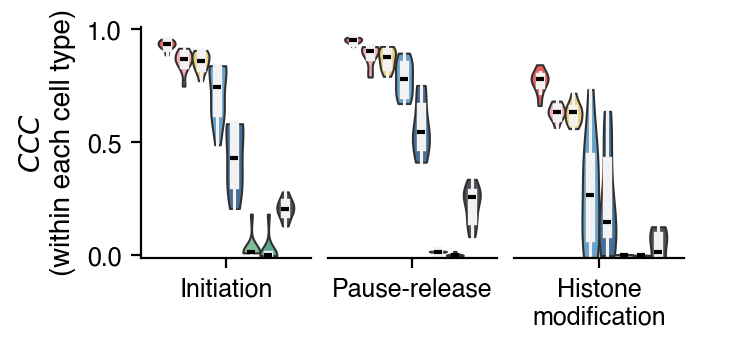

In [ ]:
sub_eval_df = eval_df.loc[eval_df["Evaluation type"]=="S"]
fig, axs = plt.subplots(1, 3, figsize=(3.5, 1.5), sharey=True, gridspec_kw=dict(wspace=0.1))

for i, level in enumerate(("Initiation", "Pause-release", "Histone\nmodification")):
    ax = axs[i]
    # plot evaluation results for the deconvoluted tracks
    data = sub_eval_df.loc[sub_eval_df["Data type"] == level].copy()
    sns.violinplot(y="R", x="Data type", hue="Model", 
                   data=data, 
                   ax=ax, cut=0, legend=False, 
                   linewidth=0.75, 
                   inner_kws=dict(color=".95", inner_color="black", inner_size=1.5), 
                   palette=COLOR_MAP,
                   
                  )
    ax.set_ylim((-0.01, 1.01))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("")

    plt.setp(ax.get_xticklabels(), rotation=0, ha="center", va="top", rotation_mode="anchor")
    if i > 0:
        ax.spines["left"].set_visible(False)
        ax.tick_params(axis='y', left=False)
    else:
        ax.set_ylabel(r"$CCC$"+"\n(within each cell type)")
handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the last plot
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

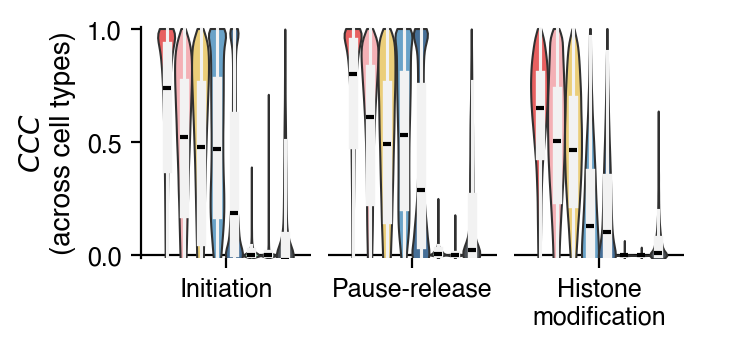

In [ ]:
sub_eval_df = eval_df.loc[eval_df["Evaluation type"]=="R"]
fig, axs = plt.subplots(1, 3, figsize=(3.5, 1.5), sharey=True, gridspec_kw=dict(wspace=0.1))

for i, level in enumerate(("Initiation", "Pause-release", "Histone\nmodification")):
    ax = axs[i]
    data = sub_eval_df.loc[sub_eval_df["Data type"] == level]
    sns.violinplot(y="R", x="Data type", hue="Model", 
                   data=data, 
                   ax=ax, cut=0, legend=False, # if i < 2 else True, 
                   linewidth=0.75,
                   inner_kws=dict(color=".95", inner_color="black", inner_size=1.5), 
                   palette=COLOR_MAP)
    ax.set_ylim((-0.01, 1.01))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.axhline(0, lw=ax.spines["top"].get_linewidth(), color="black", zorder=-1)
    ax.set_xlabel("")

    plt.setp(ax.get_xticklabels(), rotation=0, ha="center", va="top", rotation_mode="anchor")
    if i > 0:
        ax.spines["left"].set_visible(False)
        ax.tick_params(axis="y", left=False)
    else:
        ax.set_ylabel(r"$CCC$"+"\n(across cell types)")
handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the last plot
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

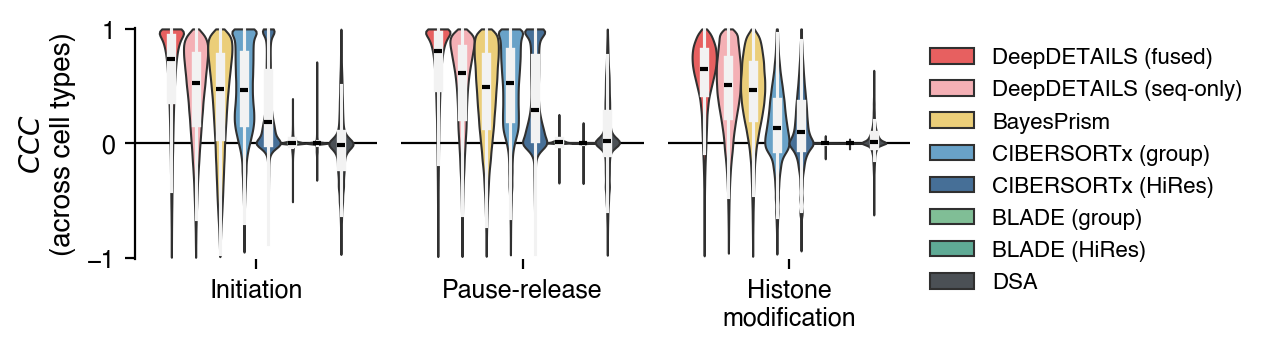

In [ ]:
sub_eval_df = eval_df.loc[eval_df["Evaluation type"]=="R"]
fig, axs = plt.subplots(1, 3, figsize=(5, 1.5), sharey=True, gridspec_kw=dict(wspace=0.1))

for i, level in enumerate(("Initiation", "Pause-release", "Histone\nmodification")):
    ax = axs[i]
    # plot evaluation results for the deconvoluted tracks
    data = sub_eval_df.loc[sub_eval_df["Data type"] == level]
    sns.violinplot(y="R", x="Data type", hue="Model", 
                   data=sub_eval_df.loc[sub_eval_df["Data type"] == level], 
                   ax=ax, cut=0, legend=False if i < 2 else True, linewidth=0.75,
                   inner_kws=dict(color=".95", inner_color="black", inner_size=1.5), 
                   palette=COLOR_MAP)

    ax.set_ylim((-1.01, 1.01))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.axhline(0, lw=ax.spines["top"].get_linewidth(), color="black", zorder=-1)
    ax.set_xlabel("")

    plt.setp(ax.get_xticklabels(), rotation=0, ha="center", va="top", rotation_mode="anchor")
    if i > 0:
        ax.spines["left"].set_visible(False)
        ax.tick_params(axis="y", left=False)
    else:
        ax.set_ylabel(r"$CCC$"+"\n(across cell types)")
handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the last plot
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

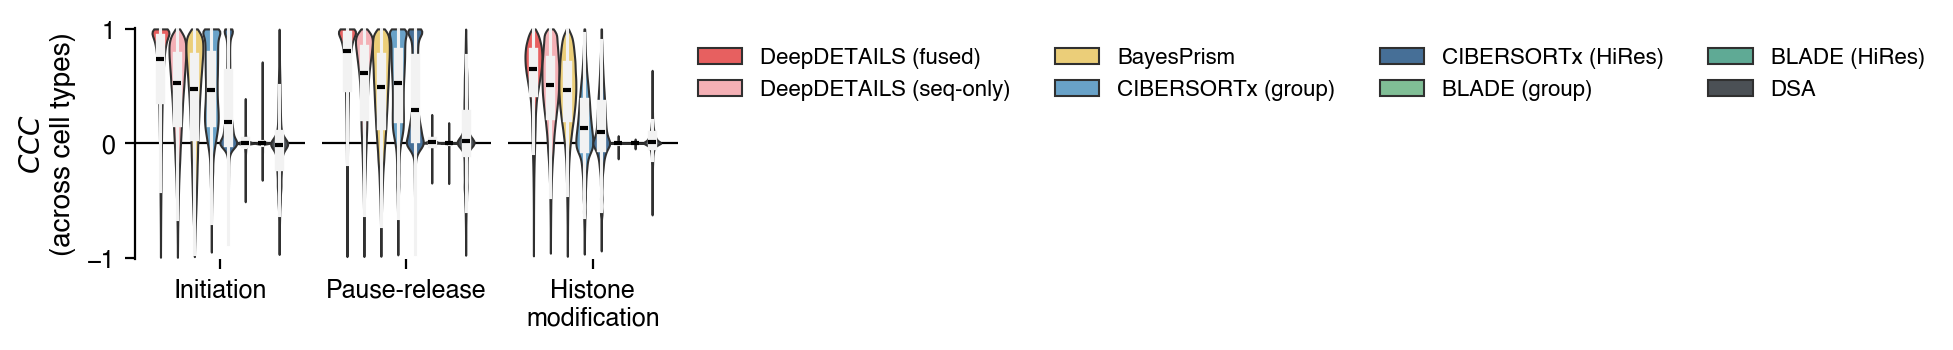

In [ ]:
sub_eval_df = eval_df.loc[eval_df["Evaluation type"]=="R"]
fig, axs = plt.subplots(1, 3, figsize=(3.5, 1.5), sharey=True, gridspec_kw=dict(wspace=0.1))

for i, level in enumerate(("Initiation", "Pause-release", "Histone\nmodification")):
    ax = axs[i]
    # plot evaluation results for the deconvoluted tracks
    data = sub_eval_df.loc[sub_eval_df["Data type"] == level]
    sns.violinplot(y="R", x="Data type", hue="Model", 
                   data=sub_eval_df.loc[sub_eval_df["Data type"] == level], 
                   ax=ax, cut=0, legend=False if i < 2 else True, linewidth=0.75,
                   inner_kws=dict(color=".95", inner_color="black", inner_size=1.5), 
                   palette=COLOR_MAP)

    ax.set_ylim((-1.01, 1.01))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.axhline(0, lw=ax.spines["top"].get_linewidth(), color="black", zorder=-1)
    ax.set_xlabel("")

    plt.setp(ax.get_xticklabels(), rotation=0, ha="center", va="top", rotation_mode="anchor")
    if i > 0:
        ax.spines["left"].set_visible(False)
        ax.tick_params(axis="y", left=False)
    else:
        ax.set_ylabel(r"$CCC$"+"\n(across cell types)")
handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the last plot
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), ncol=4)

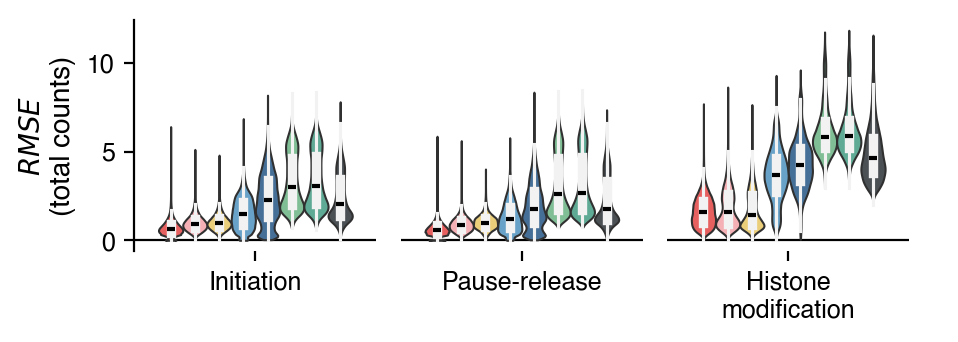

In [ ]:
sub_eval_df = eval_df.loc[eval_df["Evaluation type"]=="E"]
fig, axs = plt.subplots(1, 3, figsize=(5., 1.5), sharey=True, gridspec_kw=dict(wspace=0.1))

for i, level in enumerate(("Initiation", "Pause-release", "Histone\nmodification")):
    ax = axs[i]
    # plot evaluation results for the deconvoluted tracks
    data = sub_eval_df.loc[sub_eval_df["Data type"] == level]
    sns.violinplot(y="RMSE", x="Data type", hue="Model", 
                   data=data, 
                   ax=ax, cut=0, legend=False, #if i < 2 else True, 
                   linewidth=0.75,
                   inner_kws=dict(color=".95", inner_color="black", inner_size=1.5),
                   palette=COLOR_MAP)


    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.axhline(0, lw=ax.spines["top"].get_linewidth(), color="black", zorder=-1)
    ax.set_xlabel("")

    plt.setp(ax.get_xticklabels(), rotation=0, ha="center", va="top", rotation_mode="anchor")
    if i > 0:
        ax.spines["left"].set_visible(False)
        ax.tick_params(axis="y", left=False)
    else:
        ax.set_ylabel(r"$RMSE$"+"\n(total counts)")
handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the last plot
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))